In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
import pickle

In [3]:
  X_s = loadmat('Salinas_corrected.mat')['salinas_corrected']
  y_s = loadmat('Salinas_gt.mat')['salinas_gt']
  names_s = ['Brocoli_green_weeds_1',	'Brocoli_green_weeds_2', 'Fallow',	'Fallow_rough_plow', 'Fallow_smooth',
           'Stubble','Celery','Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green_weeds',
           'Lettuce_romaine_4wk','Lettuce_romaine_5wk', 'Lettuce_romaine_6wk','Lettuce_romaine_7wk',
           'BVinyard_untrained',	'Vinyard_vertical_trellis']


In [ ]:
X_s.shape

(512, 217, 204)

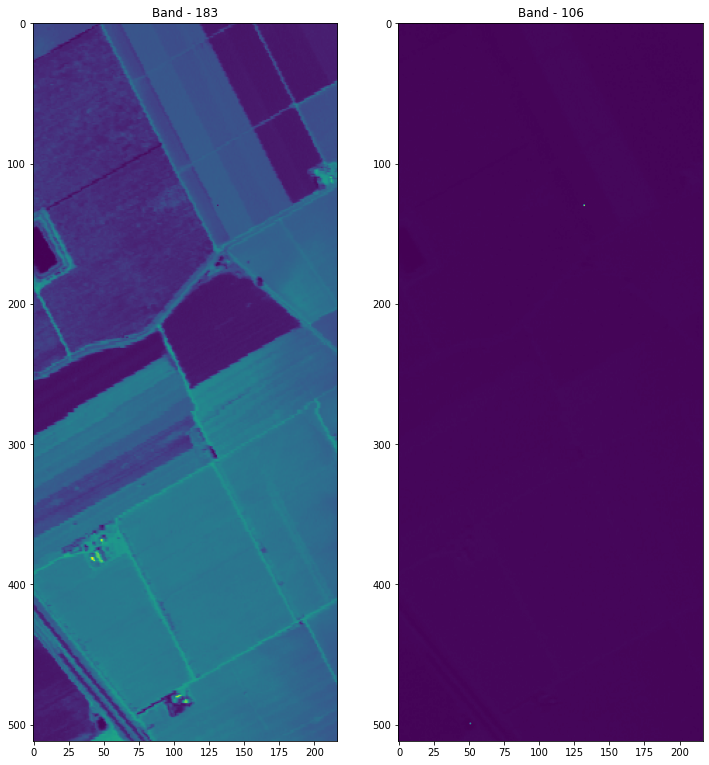

In [4]:
fig = plt.figure(figsize = (12, 24))

for i in range(1,3):
  fig.add_subplot(1,2,i)
  band= np.random.randint(X_s.shape[2])
  plt.imshow(X_s[:,:,band])
  plt.title(f'Band - {band}')

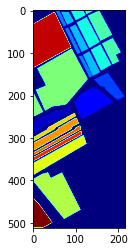

In [ ]:
imgplot = plt.imshow(y_s, cmap='jet')

## REDUCCIÓN DIMENSIONALIDAD

In [5]:
dt = X_s.reshape(-1, X_s.shape[2])
df = pd.DataFrame(data = dt)
df = pd.concat([df, pd.DataFrame(data = y_s.ravel())], axis = 1) #concatenamos df, que es la imagen normal convertida a DataFrame con y, que son los datos de salida(resultados). 
                                                               #El .ravel lo que hace es transofrmar y (145x145) a un array de una dimension (145x1)
df.columns= [f'band{i}' for i in range(1, 1+X_s.shape[2])]+['class']
df.to_csv('Dataset.csv')
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band196,band197,band198,band199,band200,band201,band202,band203,band204,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


In [ ]:
df.shape

(111104, 205)

In [ ]:
df.iloc[:, :].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band196,band197,band198,band199,band200,band201,band202,band203,band204,class
count,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,...,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000
mean,372.181929,480.388321,693.751287,1156.562923,1462.129950,1533.406025,1473.193944,1634.795552,1866.721801,1930.824417,...,116.093219,138.739181,117.048180,71.937059,104.474825,71.262025,39.304778,14.063463,22.294175,4.154927
std,62.453906,80.614130,103.217542,170.676450,227.876068,260.417860,271.714302,329.998481,404.351771,445.485781,...,63.216203,76.108928,65.012702,40.255958,59.222728,41.232828,23.280864,9.088472,13.735217,5.148078
min,87.000000,86.000000,90.000000,86.000000,91.000000,91.000000,88.000000,88.000000,87.000000,86.000000,...,-6.000000,-2.000000,-7.000000,-5.000000,-3.000000,-6.000000,-9.000000,-8.000000,-11.000000,0.000000
25%,308.000000,404.000000,604.000000,1005.000000,1260.000000,1305.000000,1240.000000,1348.000000,1514.000000,1540.000000,...,55.000000,65.000000,55.000000,33.000000,47.000000,32.000000,18.000000,7.000000,10.000000,0.000000
50%,372.000000,482.000000,721.000000,1174.000000,1496.000000,1560.000000,1512.000000,1691.000000,1936.000000,2007.000000,...,126.000000,150.000000,127.000000,78.000000,113.000000,76.000000,42.000000,15.000000,23.000000,0.000000
75%,435.000000,558.000000,745.000000,1267.000000,1617.000000,1715.000000,1664.000000,1873.000000,2157.000000,2255.000000,...,174.000000,209.000000,177.000000,109.000000,159.000000,108.000000,60.000000,21.000000,33.000000,8.000000
max,814.000000,1165.000000,1920.000000,3865.000000,5153.000000,5614.000000,5663.000000,6599.000000,7748.000000,8209.000000,...,504.000000,608.000000,523.000000,596.000000,693.000000,745.000000,765.000000,777.000000,775.000000,16.000000


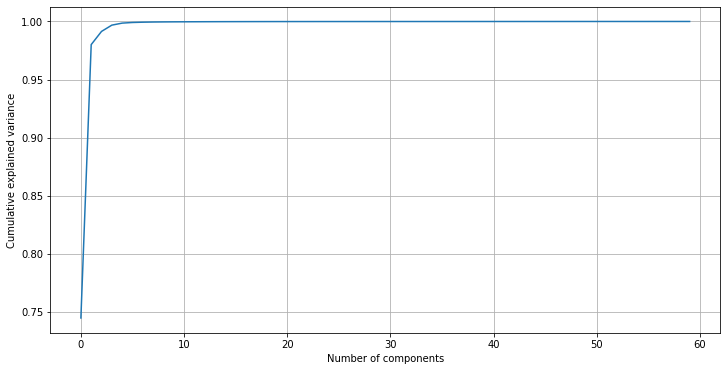

In [6]:
n=60
pca = PCA(n)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values) #Para realizar el PCA quitamos la columna de clases o resultados, puesto que lo que queremos es reducir las bandas

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [7]:
n=5
pca = PCA(n)
dt = pca.fit_transform(df.iloc[:, :-1].values) 
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y_s.ravel())], axis = 1) #Una vez realizada la reducción de dimensionalidad volvemos a anexar las clases o resultados.
q.columns = [f'PC-{i}' for i in range(1,n+1)]+['class'] #q será el Dataframe de la imagen original pero en vez de con 200 bandas con las 40 del PCA
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,class
0,-6136.415770,-4385.651601,628.426690,-302.089387,-7.164320,0
1,-6196.986718,-4360.590266,568.289463,-269.925094,-1.914969,0
2,-6359.538817,-4693.892811,578.047775,-286.413937,18.366365,0
3,-6583.700658,-5103.974489,630.466845,-313.787607,39.673922,0
4,-6834.644650,-5385.604040,666.876042,-327.332038,24.787586,0


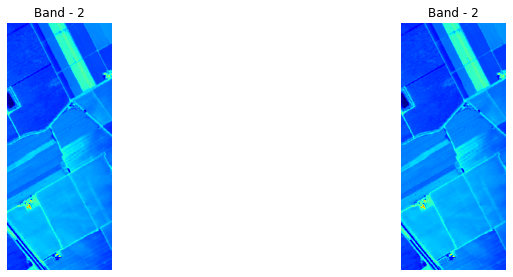

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 3):
  
    fig.add_subplot(2,3, i)
    comp = np.random.randint(q.shape[1])
    plt.imshow(q.loc[:, f'PC-{comp}'].values.reshape(X_s.shape[0], X_s.shape[1]),cmap='jet')
    plt.axis('off')
    plt.title(f'Band - {comp}')

In [8]:
x = q[q['class'] != 0] #quitamos las filas cuyo resultado supervisado es 0 puesto que no pertenece a ninguna clase.
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, stratify=y)

In [ ]:
x.shape

(54129, 6)

# ALGORITMOS DE CLASIFICACION

##SVM

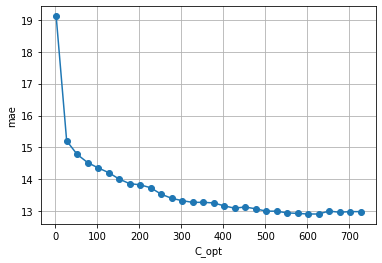

In [ ]:
mae = []
for i in range(2, 750, 25):
    svm =  SVC(kernel = 'rbf', C = i).fit(X_train, y_train)
    ypred = svm.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,750,25), mae, marker='o')
plt.xlabel('C_opt')
plt.ylabel('mae')
plt.grid()
plt.show()

In [ ]:
svm =  SVC(kernel = 'rbf', C = 600).fit(X_train, y_train)
ypred = svm.predict(X_test)

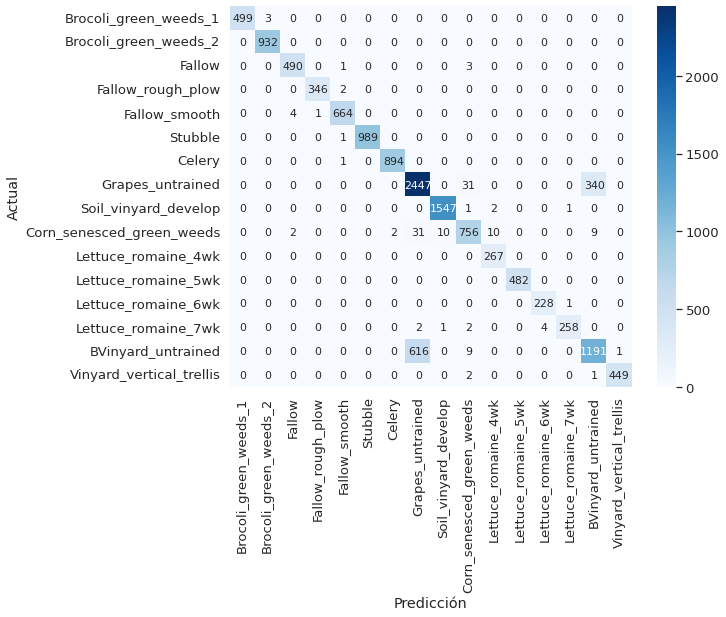

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_s, index = names_s)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [ ]:
print(classification_report(y_test, ypred, target_names = names_s))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.99      1.00       502
    Brocoli_green_weeds_2       1.00      1.00      1.00       932
                   Fallow       0.99      0.99      0.99       494
        Fallow_rough_plow       1.00      0.99      1.00       348
            Fallow_smooth       0.99      0.99      0.99       669
                  Stubble       1.00      1.00      1.00       990
                   Celery       1.00      1.00      1.00       895
         Grapes_untrained       0.79      0.87      0.83      2818
     Soil_vinyard_develop       0.99      1.00      1.00      1551
Corn_senesced_green_weeds       0.94      0.92      0.93       820
      Lettuce_romaine_4wk       0.96      1.00      0.98       267
      Lettuce_romaine_5wk       1.00      1.00      1.00       482
      Lettuce_romaine_6wk       0.98      1.00      0.99       229
      Lettuce_romaine_7wk       0.99      0.97      0.98     

In [ ]:
scores = cross_val_score(svm, X, y, cv = 10, scoring='accuracy')

In [ ]:
print(scores.mean())

0.9066297650027876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


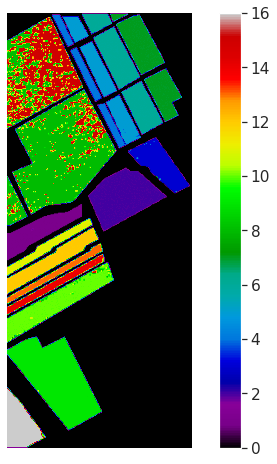

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(512, 217).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

## Decision Trees

In [ ]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8,9,10,11,12,13,14,16,18,20], 'splitter':['best','random']}
model = DecisionTreeClassifier()
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.9132490948052908
{'criterion': 'entropy', 'max_depth': 16, 'splitter': 'best'}


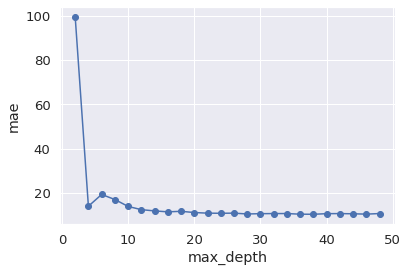

In [ ]:
mae = []
for i in range(2, 50, 2):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i, splitter='best').fit(X_train, y_train)
    ypred = model.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,50,2), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=0).fit(X_train, y_train)
ypred = model.predict(X_test)

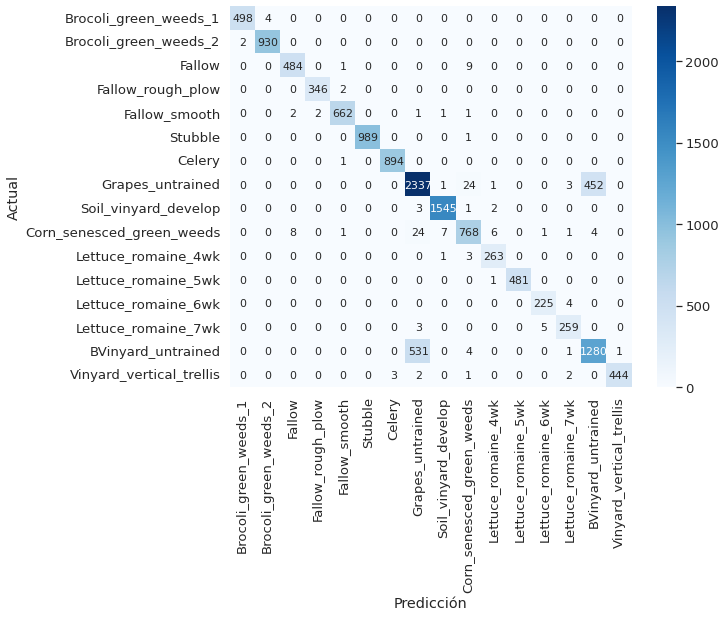

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_s, index = names_s)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [ ]:
print(classification_report(y_test, ypred, target_names = names_s))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.99      0.99       502
    Brocoli_green_weeds_2       1.00      1.00      1.00       932
                   Fallow       0.98      0.98      0.98       494
        Fallow_rough_plow       0.99      0.99      0.99       348
            Fallow_smooth       0.99      0.99      0.99       669
                  Stubble       1.00      1.00      1.00       990
                   Celery       1.00      1.00      1.00       895
         Grapes_untrained       0.81      0.83      0.82      2818
     Soil_vinyard_develop       0.99      1.00      0.99      1551
Corn_senesced_green_weeds       0.95      0.94      0.94       820
      Lettuce_romaine_4wk       0.96      0.99      0.97       267
      Lettuce_romaine_5wk       1.00      1.00      1.00       482
      Lettuce_romaine_6wk       0.97      0.98      0.98       229
      Lettuce_romaine_7wk       0.96      0.97      0.96     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


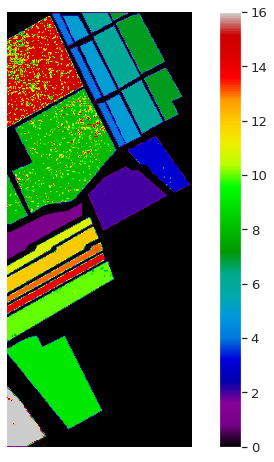

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(model.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(512, 217).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

##KNN

In [ ]:
parameters = {'weights':('uniform', 'distance'), 'algorithm':('auto', 'brute', 'ball_tree', 'kd_tree'), 'n_neighbors':[4,5,6,7,8,9,10,11,12,13,14,15], 'metric':['euclidean','manhattan']}
knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(knn, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.9292839725116382
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


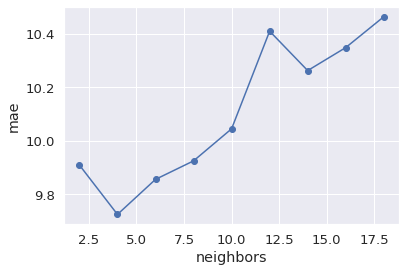

In [ ]:
mae = []
for i in range(2, 20, 2):
    knn = neighbors.KNeighborsClassifier(i, weights='distance', algorithm='auto', metric='euclidean').fit(X_train, y_train)
    ypred = knn.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,20,2), mae, marker='o')
plt.xlabel('neighbors')
plt.ylabel('mae')
plt.show()


In [ ]:
knn = neighbors.KNeighborsClassifier(11, weights='distance', algorithm='auto', metric='manhattan').fit(X_train, y_train)
ypred = knn.predict(X_test)

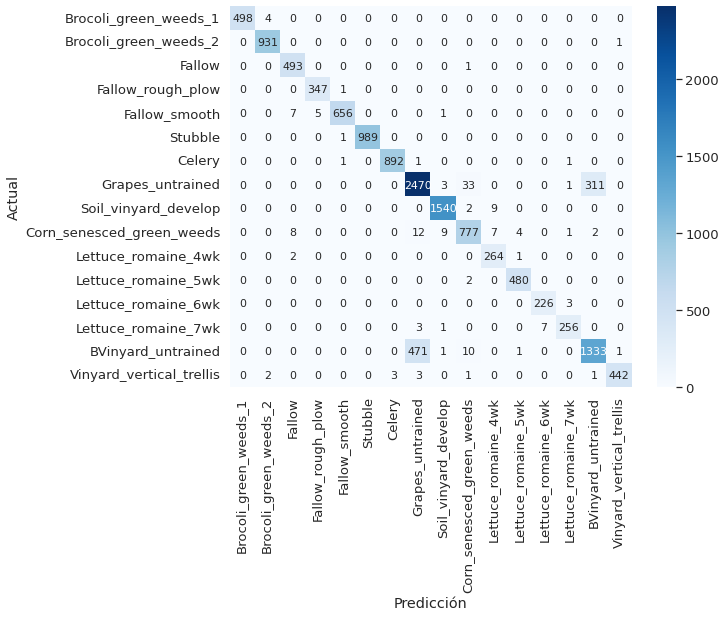

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_s, index = names_s)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [ ]:
print(classification_report(y_test, ypred, target_names = names_s))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.99      1.00       502
    Brocoli_green_weeds_2       0.99      1.00      1.00       932
                   Fallow       0.97      1.00      0.98       494
        Fallow_rough_plow       0.99      1.00      0.99       348
            Fallow_smooth       1.00      0.98      0.99       669
                  Stubble       1.00      1.00      1.00       990
                   Celery       1.00      1.00      1.00       895
         Grapes_untrained       0.83      0.88      0.85      2818
     Soil_vinyard_develop       0.99      0.99      0.99      1551
Corn_senesced_green_weeds       0.94      0.95      0.94       820
      Lettuce_romaine_4wk       0.94      0.99      0.97       267
      Lettuce_romaine_5wk       0.99      1.00      0.99       482
      Lettuce_romaine_6wk       0.97      0.99      0.98       229
      Lettuce_romaine_7wk       0.98      0.96      0.97     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


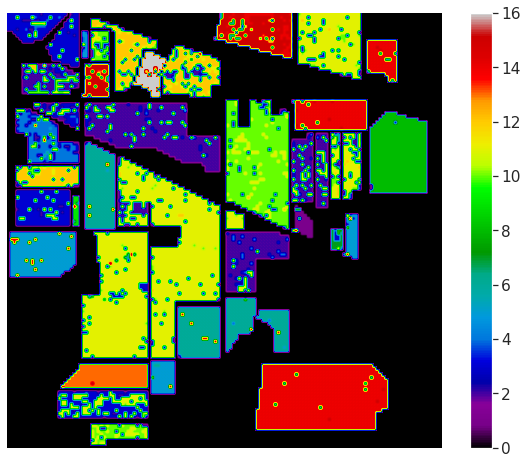

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(knn.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

# REDES NEURONALES

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math

In [ ]:
X_train[0].shape

(40,)

In [ ]:
funcion = ['LeakyReLU','sigmoid','relu','softmax']

for i in range(0,len(funcion)):
  modelo = tf.keras.Sequential([
      tf.keras.layers.Dense(units=10,input_shape=X_train[0].shape, activation=funcion[i]),
      tf.keras.layers.Dense(17, activation='softmax')
  ])
  modelo.summary()
  modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
  historial = modelo.fit(X_train,y_train, epochs=500, verbose=False)
  predicciones = modelo.predict(X_test)
  results = modelo.evaluate(X_test, y_test)
  print("funcion,test loss, test acc:",funcion[i], results)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                60        
                                                                 
 dense_9 (Dense)             (None, 17)                187       
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________
423/423 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.8993
funcion,test loss, test acc: LeakyReLU [0.2801142632961273, 0.899283230304718]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                60        
                                                                

In [ ]:
modelo = tf.keras.Sequential([
      tf.keras.layers.Dense(units=10,input_shape=X_train[0].shape, activation='relu'),
      tf.keras.layers.Dense(17, activation='softmax')
  ])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                60        
                                                                 
 dense_17 (Dense)            (None, 17)                187       
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)

In [ ]:
print(historial.history['accuracy'][999])
print(historial.history['loss'][999])

0.8875504732131958
0.28620702028274536


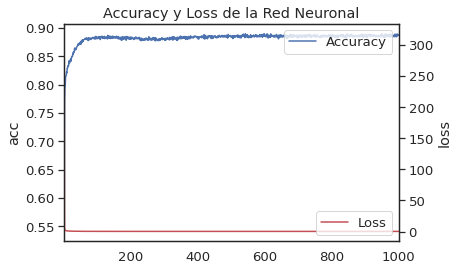

In [ ]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs   = range(1,len(acc)+1,1)


fig = plt.figure()
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(epochs, acc, 'b',label = 'Accuracy')
ax1.set_ylabel('acc')
ax1.set_title('Accuracy y Loss de la Red Neuronal')
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(epochs, loss, 'r', label = 'Loss')
ax2.set_xlim([1, len(acc)+1])
ax2.set_ylabel('loss')
ax2.set_xlabel('Iteraciones')
 
leg1 = ax1.legend(loc='upper right')
leg2 = ax2.legend(loc='lower right')


In [ ]:
predicciones = modelo.predict(X_test)
results = modelo.evaluate(X_test, y_test)
print("test loss, test acc:", results)

423/423 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.8945
test loss, test acc: [0.29864779114723206, 0.8944801688194275]


In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 48        
                                                                 
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 17)                221       
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)
print('acc: ', historial.history['accuracy'][999])
print('loss: ',historial.history['loss'][999])

acc:  0.8994728326797485
loss:  0.2540104389190674


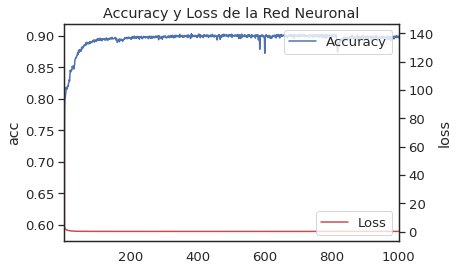

In [ ]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs   = range(1,len(acc)+1,1)


fig = plt.figure()
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(epochs, acc, 'b',label = 'Accuracy')
ax1.set_ylabel('acc')
ax1.set_title('Accuracy y Loss de la Red Neuronal')
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(epochs, loss, 'r', label = 'Loss')
ax2.set_xlim([1, len(acc)+1])
ax2.set_ylabel('loss')
ax2.set_xlabel('Iteraciones')
 
leg1 = ax1.legend(loc='upper right')
leg2 = ax2.legend(loc='lower right')

In [ ]:
predicciones = modelo.predict(X_test)

In [ ]:
results = modelo.evaluate(X_test, y_test)
print("test loss, test acc:", results)

423/423 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.9017
test loss, test acc: [0.39868247509002686, 0.901721715927124]


In [ ]:
ini_0=10
ini_1=12
count=0
for i in range(ini_0,ini_0+5):
  for j in range(ini_1,ini_1+10):
    count +=1
    modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=i,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(j, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
    ])
    modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
    historial = modelo.fit(X_train,y_train, epochs=500, verbose=False)
    results = modelo.evaluate(X_test, y_test)
    print("test loss, test acc:", results, 'params->i:', i, 'j:', j, 'repetición:', count)

423/423 [==============================] - 1s 1ms/step - loss: 0.2742 - accuracy: 0.8985
test loss, test acc: [0.27420783042907715, 0.898470401763916] params->i: 10 j: 12 repetición: 1
423/423 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8940
test loss, test acc: [0.4276127815246582, 0.8939629197120667] params->i: 10 j: 13 repetición: 2
423/423 [==============================] - 1s 1ms/step - loss: 0.2632 - accuracy: 0.8998
test loss, test acc: [0.26321330666542053, 0.8998004794120789] params->i: 10 j: 14 repetición: 3
423/423 [==============================] - 1s 1ms/step - loss: 0.3338 - accuracy: 0.8909
test loss, test acc: [0.3337831199169159, 0.8909332752227783] params->i: 10 j: 15 repetición: 4
423/423 [==============================] - 1s 1ms/step - loss: 0.2608 - accuracy: 0.8962
test loss, test acc: [0.2608400285243988, 0.896179735660553] params->i: 10 j: 16 repetición: 5
423/423 [==============================] - 1s 1ms/step - loss: 0.2452 - acc

In [11]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
    ])
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
historial = modelo.fit(X_train,y_train, epochs=500, verbose=True)
results = modelo.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Epoch 1/500
1269/1269 [==============================] - 7s 4ms/step - loss: 120.0163 - accuracy: 0.6402
Epoch 2/500
1269/1269 [==============================] - 4s 3ms/step - loss: 3.2431 - accuracy: 0.7573
Epoch 3/500
1269/1269 [==============================] - 4s 3ms/step - loss: 2.3829 - accuracy: 0.7753
Epoch 4/500
1269/1269 [==============================] - 3s 2ms/step - loss: 2.1059 - accuracy: 0.7869
Epoch 5/500
1269/1269 [==============================] - 3s 2ms/step - loss: 1.7240 - accuracy: 0.7962
Epoch 6/500
1269/1269 [==============================] - 2s 2ms/step - loss: 1.5631 - accuracy: 0.8020
Epoch 7/500
1269/1269 [==============================] - 2s 1ms/step - loss: 1.4016 - accuracy: 0.8090
Epoch 8/500
1269/1269 [==============================] - 2s 1ms/step - loss: 1.2436 - accuracy: 0.8162
Epoch 9/500
1269/1269 [==============================] - 2s 1ms/step - loss: 1.1877 - accuracy: 0.8188
Epoch 10/500
1269/1269 [==============================] - 2s 1ms/step -

In [12]:
predicciones = modelo.predict(X_test)
ypred = np.argmax(predicciones, axis=1)

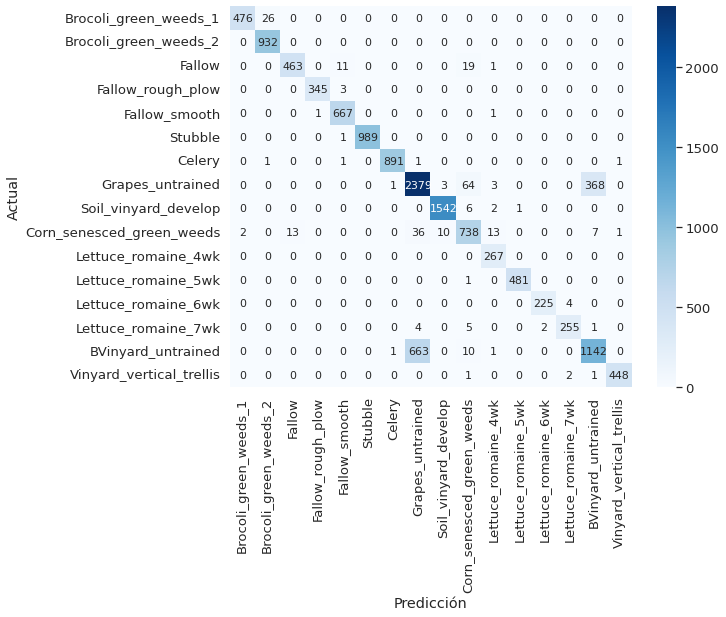

In [18]:
data = metrics.confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_s, index = names_s)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [19]:
print(classification_report(y_test, ypred, target_names = names_s))

                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      0.95      0.97       502
    Brocoli_green_weeds_2       0.97      1.00      0.99       932
                   Fallow       0.97      0.94      0.95       494
        Fallow_rough_plow       1.00      0.99      0.99       348
            Fallow_smooth       0.98      1.00      0.99       669
                  Stubble       1.00      1.00      1.00       990
                   Celery       1.00      1.00      1.00       895
         Grapes_untrained       0.77      0.84      0.81      2818
     Soil_vinyard_develop       0.99      0.99      0.99      1551
Corn_senesced_green_weeds       0.87      0.90      0.89       820
      Lettuce_romaine_4wk       0.93      1.00      0.96       267
      Lettuce_romaine_5wk       1.00      1.00      1.00       482
      Lettuce_romaine_6wk       0.99      0.98      0.99       229
      Lettuce_romaine_7wk       0.98      0.96      0.97     